In [5]:
import numpy as np
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :3]  # We take the first three features for 3D plotting
y = iris.target

print(X.shape,y.shape)
# We'll use only two classes for simplicity (binary classification)
X = X[y != 2]
y = y[y != 2]
print(X.shape,y.shape)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

def plot_decision_boundary_3d(clf, X, y):
    # Create a 3D scatter plot
    fig = go.Figure()

    # Plot the points
    fig.add_trace(go.Scatter3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        mode='markers',
        marker=dict(size=5, color=y, colorscale='Viridis', opacity=0.8),
        name='Data Points'
    ))

    # Create a mesh grid for the decision boundary and margin planes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    # Calculate decision boundary plane (decision function = 0)
    zz_decision = -(clf.coef_[0, 0] * xx + clf.coef_[0, 1] * yy + clf.intercept_[0]) / clf.coef_[0, 2]

    # Calculate margin planes (decision function = +/-1)
    zz_margin_positive = -(clf.coef_[0, 0] * xx + clf.coef_[0, 1] * yy + clf.intercept_[0] - 1) / clf.coef_[0, 2]
    zz_margin_negative = -(clf.coef_[0, 0] * xx + clf.coef_[0, 1] * yy + clf.intercept_[0] + 1) / clf.coef_[0, 2]

    # Plot decision boundary surface
    fig.add_trace(go.Surface(
        x=xx, y=yy, z=zz_decision,
        colorscale='Blues', opacity=0.5,
        name='Decision Boundary'
    ))

    # Plot positive margin plane
    fig.add_trace(go.Surface(
        x=xx, y=yy, z=zz_margin_positive,
        colorscale='Reds', opacity=0.3,
        name='Positive Margin Plane'
    ))

    # Plot negative margin plane
    fig.add_trace(go.Surface(
        x=xx, y=yy, z=zz_margin_negative,
        colorscale='Reds', opacity=0.3,
        name='Negative Margin Plane'
    ))

    # Plot support vectors
    fig.add_trace(go.Scatter3d(
        x=clf.support_vectors_[:, 0], y=clf.support_vectors_[:, 1], z=clf.support_vectors_[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', opacity=0.8),
        name='Support Vectors'
    ))

    fig.update_layout(
        title="SVM Decision Boundary and Margins in 3D",
        scene=dict(
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            zaxis_title='Feature 3'
        )
    )

    fig.show()

# Plot the decision boundary in 3D
plot_decision_boundary_3d(svm_classifier, X_test, y_test)


(150, 3) (150,)
(100, 3) (100,)


In [4]:
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
fig = go.Figure()

    # Plot the points
fig.add_trace(go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(size=5, color=y, colorscale='Viridis', opacity=0.8),
    name='Data Points'
))

## Support Vector Classifier Implementation

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [139]:
x,y = make_classification(n_classes=2,n_samples=100,n_features=2,n_clusters_per_class=2,random_state=43,n_redundant=0)

In [140]:
X = pd.DataFrame(data = x,columns=['x1','x2'])
X

,x1,x2
0,-2.185604,1.651320
1,-1.783409,-1.484633
2,0.056429,1.525126
3,-0.719240,-0.482999
4,-0.140685,0.432395
...,...,...
95,-1.028719,0.593523
96,-0.594751,-0.219462
97,0.406200,1.818042
98,-0.340339,0.032308


In [141]:
y

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

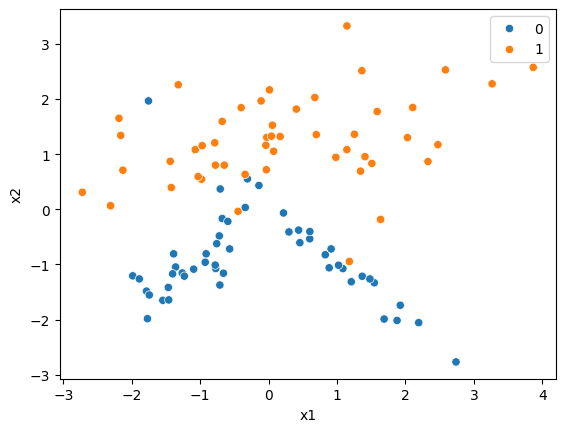

In [142]:
sns.scatterplot(x=X['x1'],y=X['x2'],hue=y)
plt.legend()

In [107]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(70, 2) (30, 2) (70,) (30,)


In [108]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
svc

SVC(kernel='linear')

In [109]:
y_pred = svc.predict(X_test)

print(confusion_matrix(y_test,y_pred))

[[14  2]
 [ 0 14]]


In [110]:
print(accuracy_score(y_test,y_pred))

0.9333333333333333


## Kernal

In [143]:
x,y = make_classification(n_classes=2,n_samples=300,n_features=2,n_clusters_per_class=2,n_redundant=0,random_state=40)
X = pd.DataFrame(data=x,columns=['x1','x2'])
X

,x1,x2
0,-1.183842,0.737409
1,-0.227184,-1.673124
2,0.617527,0.926987
3,-0.901820,-1.101900
4,-1.214299,1.020456
...,...,...
295,0.843663,1.083699
296,1.189211,0.851979
297,1.454995,-0.690569
298,2.054717,0.076935


In [144]:
y

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0])

<Axes: xlabel='x1', ylabel='x2'>

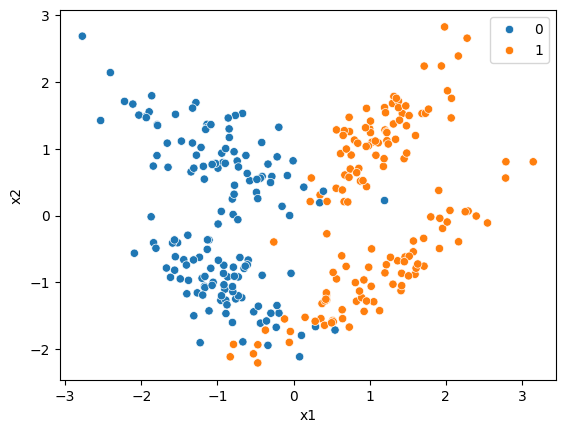

In [145]:
sns.scatterplot(x=X['x1'],y=X['x2'],hue=y)

In [146]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(210, 2) (90, 2) (210,) (90,)


## kernal - Polynomial

In [147]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)
svc

SVC(kernel='poly')

In [148]:
y_pred = svc.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[42  1]
 [ 4 43]]
0.9444444444444444


In [136]:
rbf = SVC(kernel='poly')
rbf.fit(X_train,y_train)
rbf

SVC(kernel='poly')

In [132]:
y_pred = rbf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[40  3]
 [ 3 44]]
0.9333333333333333


## kernal - 2

In [150]:
x,y = make_classification(n_classes=2,n_features=2,n_samples=100,n_redundant=0)
X = pd.DataFrame(x)
X

,0,1
0,0.823026,0.780891
1,-0.585316,-0.711428
2,-0.610103,1.108421
3,0.991520,0.161626
4,1.351154,-1.460227
...,...,...
95,1.148076,0.468564
96,1.121682,0.436350
97,2.532220,-2.439226
98,1.040432,0.786063
